### End-to-End Exploratory Data Analysis (EDA) on the Titanic Dataset

<h4>Project Objective</h4>
To perform a comprehensive, step-by-step exploratory data analysis to understand the key factors that influenced
survival on the Titanic. This notebook will serve as a complete guide, covering data loading, cleaning, analysis, feature engineering, and
visualization, with theoretical explanations at each stage.

In [53]:
from asyncio import timeout_at
from statistics import correlation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize

from matplotlib.pyplot import suptitle

In [54]:
#set plot style for better aesthetics
sns.set(style="white")

### STEP 2

<h3>Data Loading and Initial Inspection </h3>

In [55]:
titanic_data = pd.read_csv('D:\\ENGINEERING\\PYTHON\\21 DAYS 21 PROJECTS\\DAY 1 - DATA STORYTELLING TITANIC SURVIVAL\\21-Days-21-Projects-Dataset\\Datasets\\Titanic-Dataset.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Pclass** : is a proxy for socio-economic status (SES)
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;*1 - Upper*
&nbsp;&nbsp;&nbsp;&nbsp;*2 - Middle*
&nbsp;&nbsp;&nbsp;&nbsp;*3 - Lower*

**Fare** : is in pre-1970 British Pounds (£)
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;Conversion factors:
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1 £ = 12s = 240d
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1s = 20d

**SibSp** : Number of Siblings/Spouses Aboard

**Parch** : Number of Parents/Children Aboard

**Embarked** : Port of Embarkation
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;*C = Cherbourg*
&nbsp;&nbsp;&nbsp;&nbsp;*Q = Queenstown*
&nbsp;&nbsp;&nbsp;&nbsp;*S = Southampton*


In [56]:
titanic_data.shape

(891, 12)

In [57]:
#summary of the table that we have
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Interpretation of .info()**

Missing Values : Ages, Cabin, and Embarked <BR>
    *<u>Cabin</u> mei sabse jyada missing values hai*

In [58]:
#description mei
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Interpretation of Describe** <br>

*<li>Survived:</li>* &nbsp;&nbsp;&nbsp; 0.383838 -> 38% lived / survived <br>
*<li>Age:</li>* &nbsp;&nbsp;&nbsp; min - 0.42 = 5 months <br>&nbsp;&nbsp;&nbsp; max - 80 = 80 yrs <br>
*<li>Fare:</li>* &nbsp;&nbsp;&nbsp; mean -> 32 <br> &nbsp;&nbsp;&nbsp; max -> 512 <br> &nbsp;&nbsp;&nbsp; highly Skewed = extreme outliers

### STEP 3
<h1> DATA CLEANING </h1>

#### 📘 Theoretical Concept: Missing Value Imputation

> *Imputation* is the process of **replacing missing data** with substituted values.
> The strategy depends on the **data type** and its **distribution**:

---

###### 🔢 Numerical Data
- For **skewed distributions** (like *Age* and *Fare*),
  using the **median** is more robust than the mean
  because it is **not affected by outliers**.

---

###### 🏷️ Categorical Data
- A common strategy is to fill with the **mode** (*the most frequent value*).

---

###### 🚪 High Cardinality / Too Many Missing Values
- For columns like **Cabin**, where most data is missing:
  - Imputing might not be effective.
  - We could either **drop the column**
  - Or engineer a new feature from it (e.g., `Has_Cabin`).

---


In [59]:
titanic_data['Cabin'].value_counts()

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

In [60]:
#checking the number of NULL values
print(titanic_data.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


######  AGE

In [61]:
median_age = titanic_data['Age'].median()
titanic_data['Age'] = titanic_data['Age'].fillna(median_age)

In [62]:
#checking missing values in AGE after 'fillna'
print(titanic_data['Age'].isna().sum())

0


###### EMBARKED

In [63]:
print(titanic_data['Embarked'].isna().sum())

2


In [64]:
#we will use MODE
mode_embarked = titanic_data['Embarked'].mode()[0]
titanic_data['Embarked'] = titanic_data['Embarked'].fillna(mode_embarked)


In [65]:
print(titanic_data['Embarked'].isna().sum())

0


###### CABIN

In [66]:
#over 77% missing data - imputing is not a good idea - will create a new feature 'Has_cabin'

titanic_data['Has_Cabin'] = titanic_data['Cabin'].notna().astype(int)
# 1 -> has cabin
# 0 -> do not have cabin

In [67]:
titanic_data.drop('Cabin', axis=1, inplace=True)

In [68]:
titanic_data.shape

(891, 12)

In [69]:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Has_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,0


In [70]:
#CHECKING MISSING VALUES
print(titanic_data.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Has_Cabin      0
dtype: int64


### STEP 4
<H1> <span style="font-weight:bold"> UNIVARIATE ANALYSIS </H1>

#### 📊 <span style="color:greenyellow"> Theoretical Concept: Univariate Analysis </span>

Univariate Analysis is the **simplest form of data analysis**, where the dataset contains only **one variable**.
The main purpose is to **describe the data** and **identify patterns** within it.

---

###### 🏷️ <span style="color:yellow"> Categorical Variables </span>
- Use **frequency tables** to summarize counts.
- Use **bar charts** (`countplot`) or **pie charts** to visualize the proportion of each category.

---

###### 🔢 <span style="color:yellow"> Numerical Variables </span>
- Use **histograms** (`histplot`) or **kernel density plots** (`kdeplot`) to understand the distribution.
- Use **box plots** (`boxplot`) to identify:
  - Central tendency
  - Spread of the data
  - Outliers

---


<h5> CATEGORICAL DATA </h5>

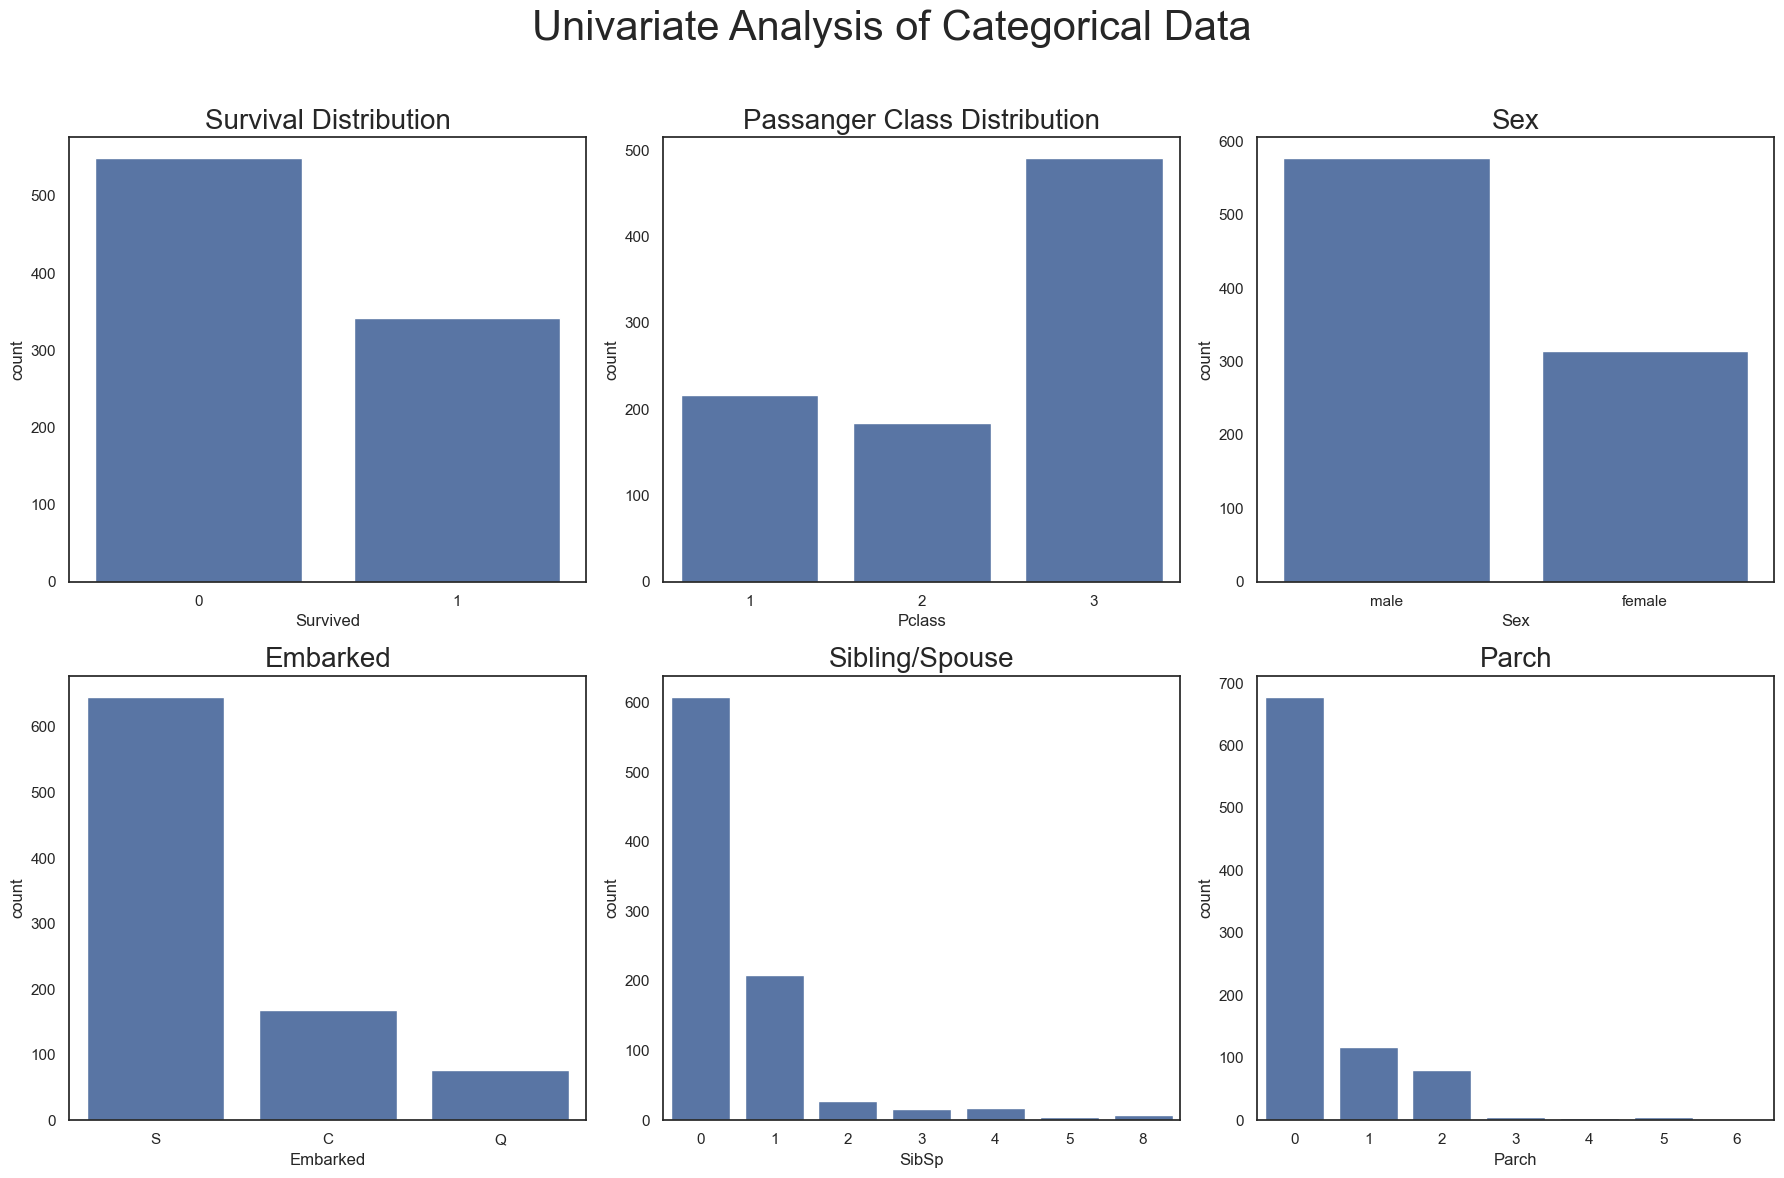

In [71]:
#set up the figure for plotting
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Univariate Analysis of Categorical Data', fontsize= 30)

"""
two galatiya ->
    1st = subplot and subplots is not same
    2nd = subtitle nahi...suptitle hota hai
"""

#plotting each categorical feature
sns.countplot(ax=axes[0, 0], x='Survived', data=titanic_data).set_title('Survival Distribution', fontdict= {'fontsize': 20})

sns.countplot(ax=axes[0, 1], x='Pclass', data=titanic_data).set_title('Passanger Class Distribution', fontdict= {'fontsize': 20})

sns.countplot(ax=axes[0, 2], x='Sex', data=titanic_data).set_title('Sex', fontdict= {'fontsize': 20})

sns.countplot(ax=axes[1, 0], x='Embarked', data=titanic_data).set_title('Embarked', fontdict= {'fontsize': 20})

sns.countplot(ax=axes[1, 1], x='SibSp', data=titanic_data).set_title('Sibling/Spouse', fontdict= {'fontsize': 20})

sns.countplot(ax=axes[1, 2], x='Parch', data=titanic_data).set_title('Parch', fontdict= {'fontsize': 20})

plt.tight_layout(rect=(0, 0, 1, 0.96))
plt.show()

<h4> Key Insights </h4>

- Survival: Most passengers (Over 500) did not survive
- Pclass  : The 3rd class was the most populated, followed by 1st, then 2nd
- Sex     : There was significantly more males than females.
- Embarked: The vast majority of passengers embarked from Southampton ('S')
- SibSp & Parch: Most Passengers travelled alone.

<h5> NUMERICAL DATA </h5>


 Analyzing numerical Features


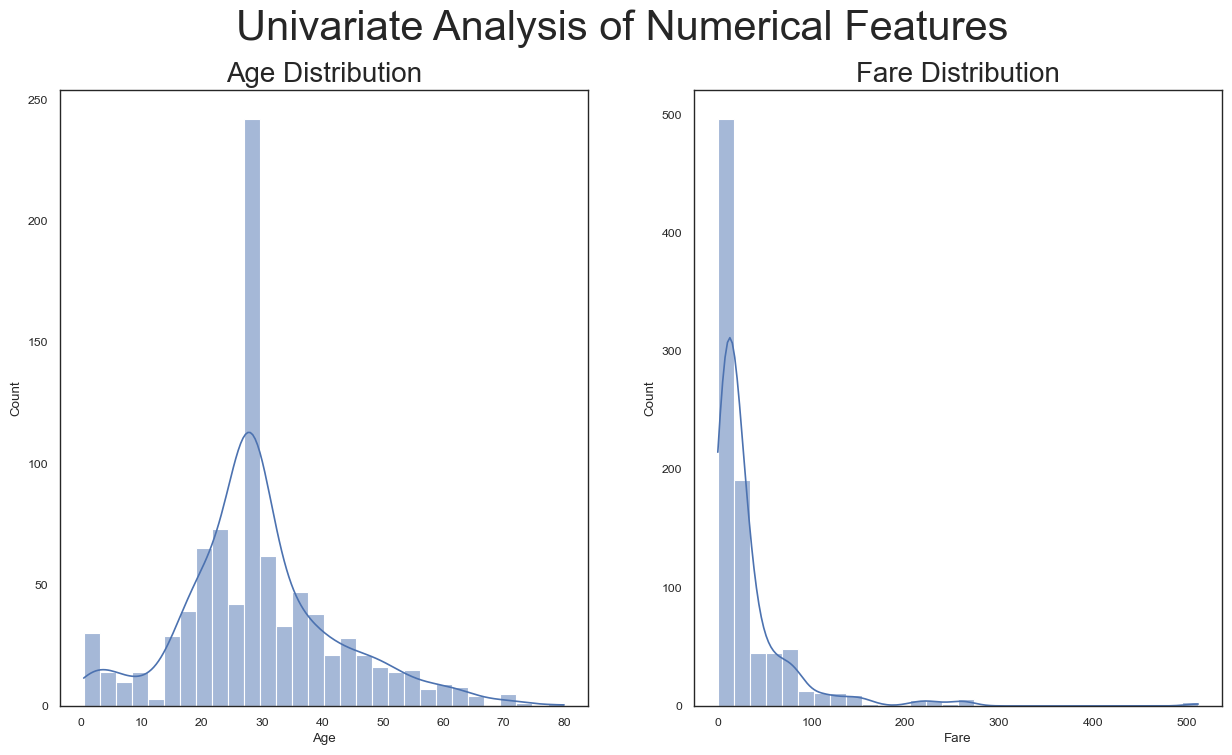

In [78]:
print("\n Analyzing numerical Features")

fig, axes = plt.subplots(1, 2, figsize=(15, 8))
fig.suptitle('Univariate Analysis of Numerical Features', fontsize= 30)

sns.histplot(ax=axes[0], x='Age', data=titanic_data, kde=True, bins=30).set_title('Age Distribution', fontdict= {'fontsize': 20})
sns.histplot(ax=axes[1], x='Fare', data=titanic_data, kde=True, bins=30).set_title('Fare Distribution', fontdict= {'fontsize':20})
sns.set_context("paper")

<h4> Key Insights </h4>

- Age: The distribution peaks around the range 20-30. because we filled missing values with the median(28) = height of the central bar
- Fare: The distribution is heavily right-skewed, confirming that most tickets were cheap, with a few very expensive exceptions

### STEP 5

<h1> <span style="font-weight:bold"> BIVARIATE ANALYSIS </span> </H1>

explore the relationship between two variables

### 🔗 <span style="color:greenyellow"> Theoretical Concept: Bivariate Analysis </span>

Bivariate Analysis involves **two different variables**, and its main purpose is to **find relationships** between them.

---

##### 🏷️ <span style="color:yellow"> Categorical vs. Numerical </span>
- Use **bar plots** (`barplot`) to compare the **mean (or another estimator)** of the numerical variable across categories.
- Use **box plots** (`boxplot`) or **violin plots** (`violinplot`) for a more detailed view of distribution.

---

##### 🏷️ <span style="color:yellow"> Categorical vs. Categorical </span>
- Use **stacked bar charts** to compare proportions.
- Use **contingency tables** (`crosstabs`) for frequency-based relationships.

---

##### 🔢 <span style="color:yellow"> Numerical vs. Numerical </span>
- Use a **scatter plot** (`scatterplot`) to visualize the relationship.
- Use a **correlation matrix** to quantify the strength of the relationship.

---


#### Feature vs Survival

In [81]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Has_Cabin
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,0.228956
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.420397
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


Text(0.5, 1.0, 'Survival Rate by Has Cabin')

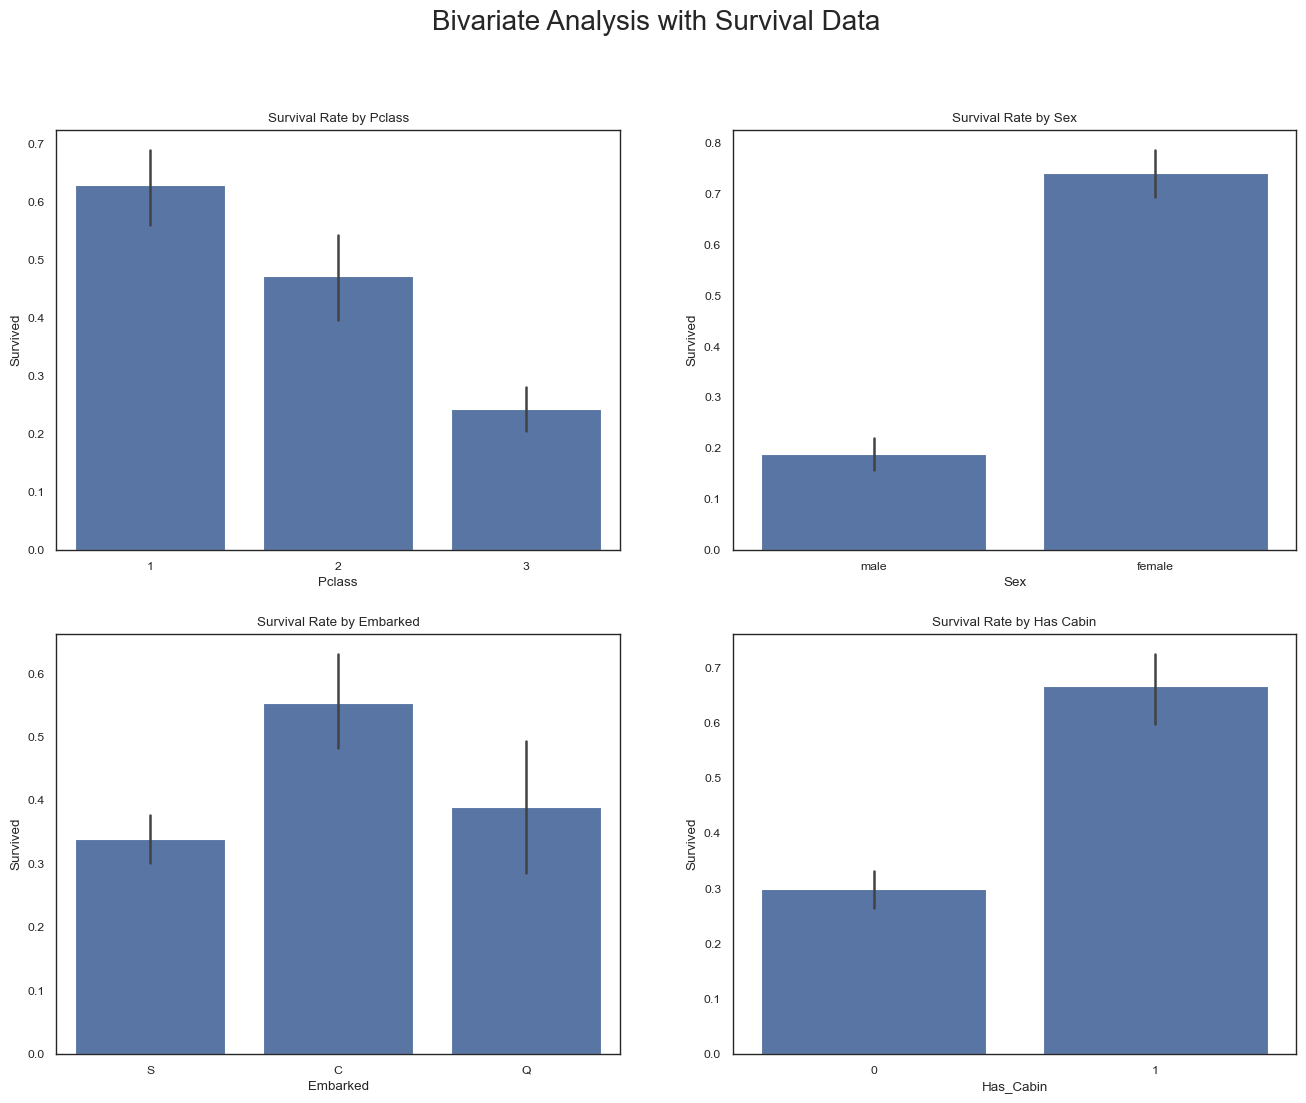

In [85]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Bivariate Analysis with Survival Data", fontsize= 20)

#pclass vs Survived
sns.barplot(ax=axes[0, 0], x='Pclass', y='Survived' , data=titanic_data).set_title('Survival Rate by Pclass')

#sex vs survived
sns.barplot(ax=axes[0, 1], x='Sex', y='Survived', data=titanic_data).set_title("Survival Rate by Sex")

#Embarked vs survived
sns.barplot(ax=axes[1, 0], x='Embarked', y='Survived', data=titanic_data).set_title('Survival Rate by Embarked')

# Has_cabin vs Survived
sns.barplot(ax=axes[1, 1], x="Has_Cabin", y="Survived", data=titanic_data).set_title('Survival Rate by Has Cabin')

<h4> Key Insights </h4>

-   PClass : 1st class passengers had a >60% survival rate
-   Sex    : Female had the major survival rate
-   Embarked: Passegers from Cherbourg ('C') had a higher survival rate
-   Has_cabin: jinke pass cabin the...unka survival rate jyada hai

#### age vs survival

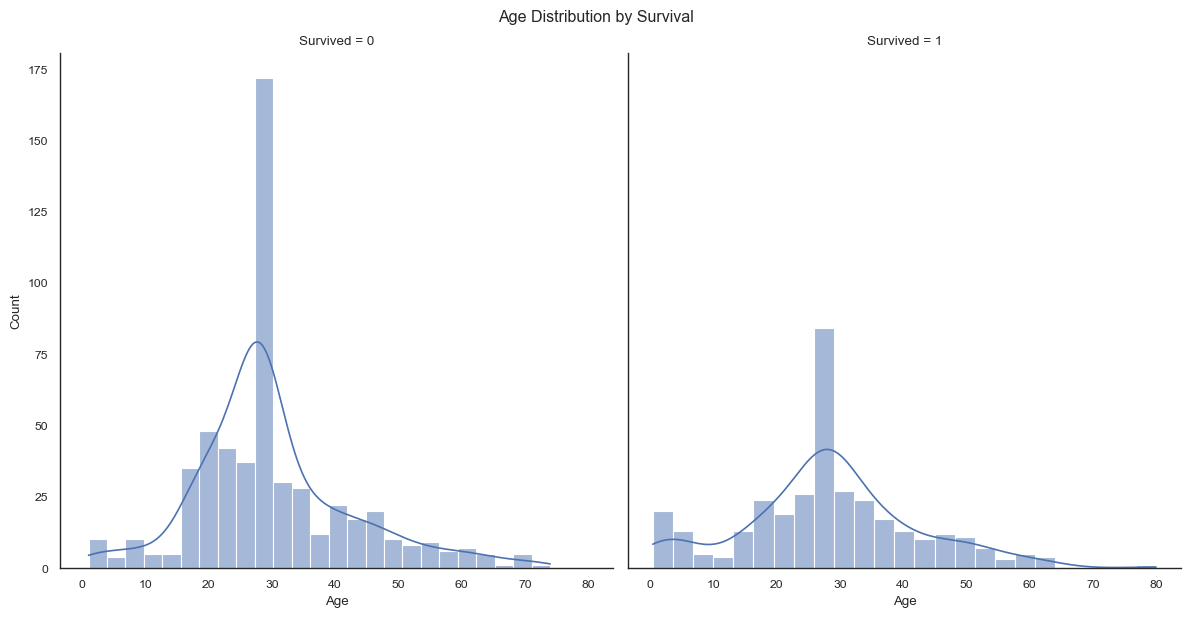

In [86]:
# age vs Survival

g = sns.FacetGrid(titanic_data, col='Survived', height=6)
g.map(sns.histplot, 'Age', bins=25, kde=True)
plt.suptitle('Age Distribution by Survival', y=1.02)
plt.show()

<h4> KEY INSIGHTS </h4>

-   infants and young children had a higher prob of survival
-   A large portion of non-survivors were young adults (20 - 40)
-   oldest people did not survive

#### Outlier Analysis for "FARE"

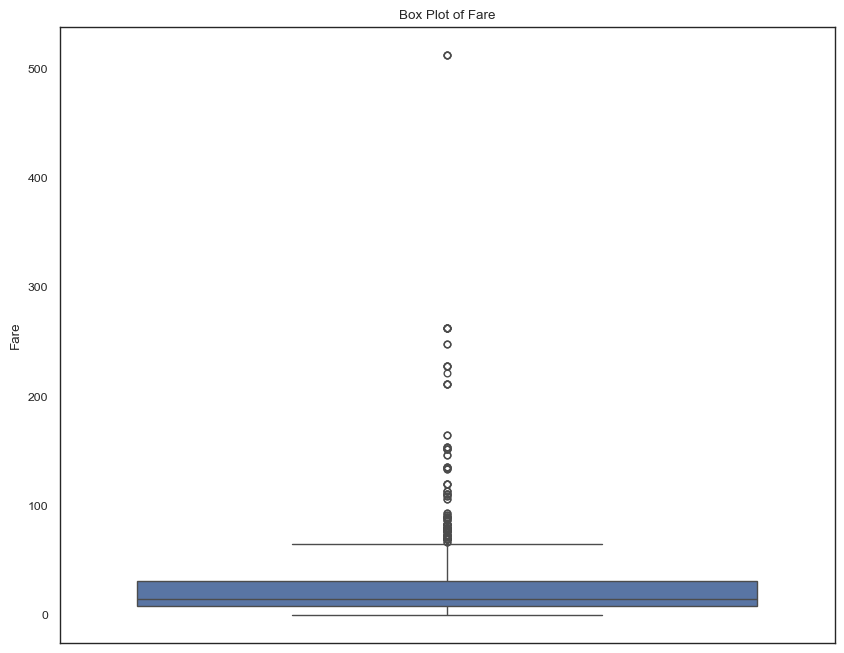

In [92]:
plt.figure(figsize=(10, 8))
sns.boxplot(y='Fare', data=titanic_data)
plt.title('Box Plot of Fare')
plt.ylabel('Fare')
plt.show()

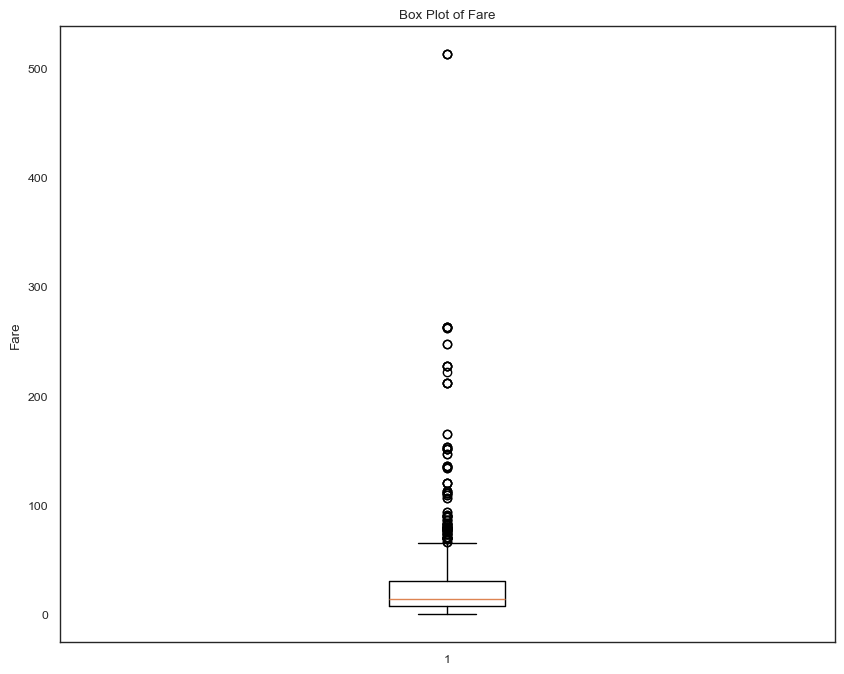

In [94]:
plt.figure(figsize=(10, 8))

fare_data = titanic_data['Fare']

plt.boxplot(fare_data, vert=True)
plt.title('Box Plot of Fare')
plt.ylabel('Fare')
plt.show()

<h4> OBSERVATION </h4>

The box plot confirms the presence of significant outliers. Most fares are concentrated below $$100, but there are several fares extending far beyond, with some even exceeding $500. These are likely first-class passengers who booked luxurious suites.

### STEP 6

# <span style="font-weight:bolt"> FEATURE ENGINEERING </span>

#### 🛠️ <span style="color:greenyellow"> Theoretical Concept: Feature Engineering  </span>

**$Feature Engineering$** is the process of using **domain knowledge** to extract features (*characteristics, properties, attributes*) from raw data.
A good feature should be:
- **Relevant** to the problem
- **Easy** for a model to understand

---

###### 🔑 <span style="color:yellow"> Common Techniques   </span>

1. **Combining Features**
   - Creating a new feature by combining existing ones
   - Example: `FamilySize = SibSp + Parch`

2. **Extracting from Text**
   - Pulling out specific information from a text feature
   - Example: extracting **titles** from the *Name* column

3. **Binning**
   - Converting a continuous numerical feature into a categorical one
   - Example: binning **Age** into groups like `'Child'`, `'Adult'`, `'Senior'`

---


In [95]:
# 1. create a "FAMILY SIZE" feature
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1

# 2. Create a 'IsAlone' feature
titanic_data['IsAlone'] = 0
titanic_data.loc[titanic_data['FamilySize'] == 1, 'IsAlone'] = 1

print("Created 'FamilySize' and 'IsAlone' columns")
titanic_data[['FamilySize', 'IsAlone']].head()

Created 'FamilySize' and 'IsAlone' columns


,FamilySize,IsAlone
0,2,0
1,2,0
2,1,1
3,2,0
4,1,1


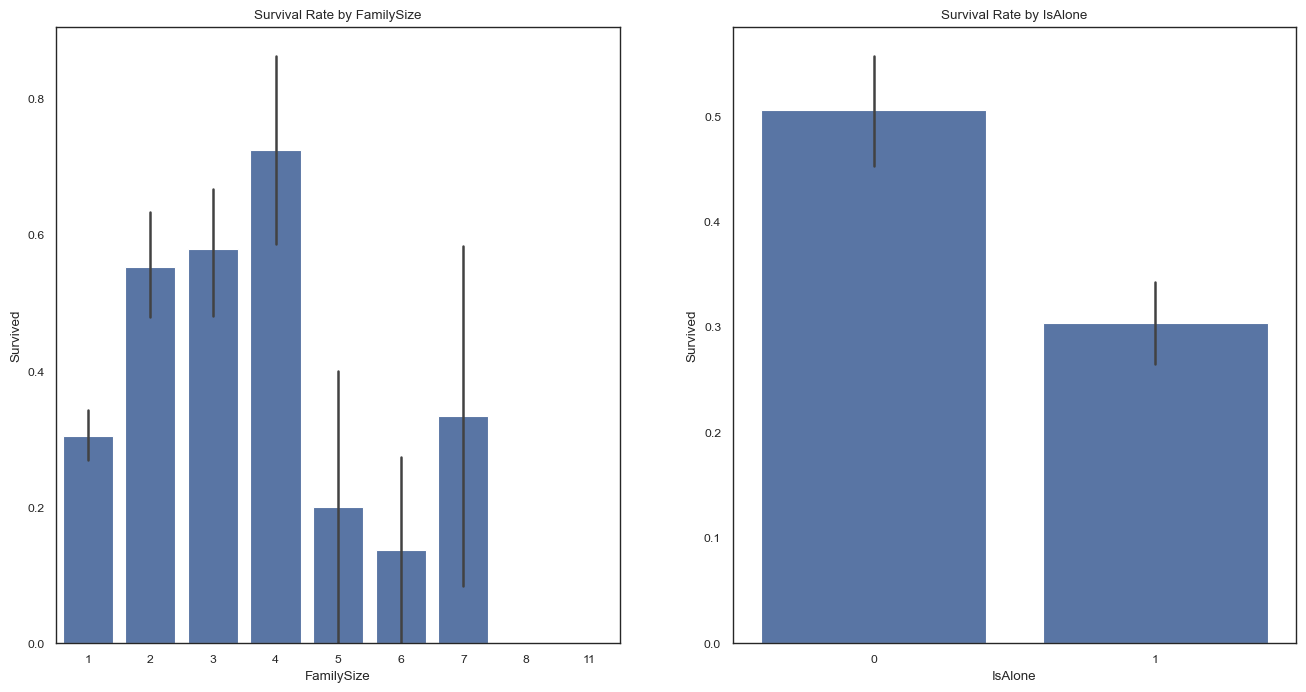

In [96]:
# analyze the new family-related features against survival
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

#survival rabe by familySize
sns.barplot(ax=axes[0], x='FamilySize', y='Survived', data=titanic_data).set_title('Survival Rate by FamilySize')


#survival rate by IsAlone
sns.barplot(ax=axes[1], x='IsAlone', y='Survived', data=titanic_data).set_title('Survival Rate by IsAlone')

plt.show()

<h4> OBSERVATION </h4>

-   very large families (>4) had poor survival rate
-   alone log...survive kr gaye aram se....akele the na

###### extracting titles from name

In [100]:
titanic_data['Title'] = titanic_data['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

print("Extracted title")
print(titanic_data['Title'].value_counts())

Extracted title
Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64


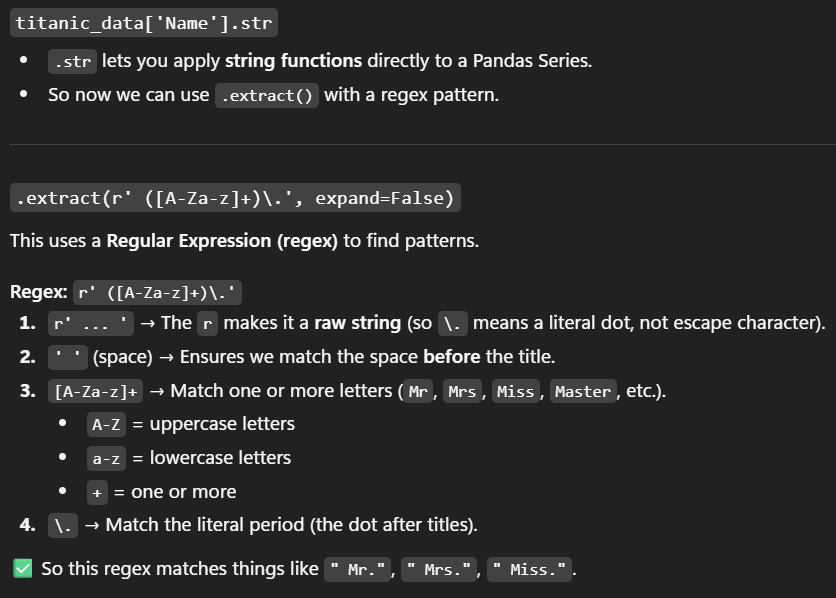

###### Categorizing some titles

In [101]:
titanic_data['Title'] = titanic_data['Title'].replace(['Lady', 'Countess', 'Capt', 'Sir', 'Don', 'Major', 'Dr', 'Col', 'Rev', 'Jonkheer'], 'Rare')

titanic_data['Title'] = titanic_data['Title'].replace('Mlle', 'Miss')
titanic_data['Title'] = titanic_data['Title'].replace('Ms', 'Miss')
titanic_data['Title'] = titanic_data['Title'].replace('Mme', 'Mrs')

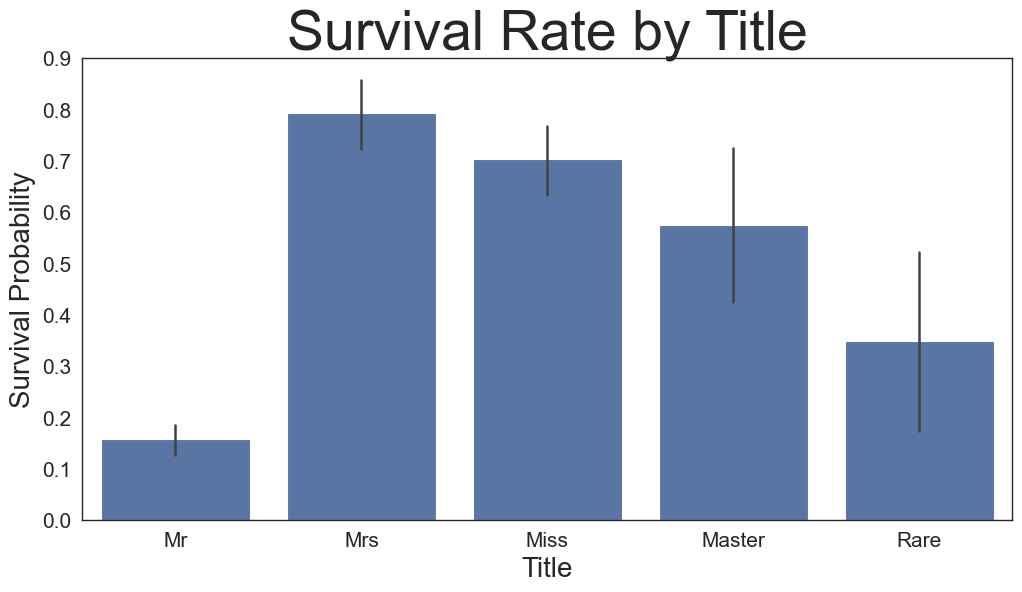

In [119]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Title', y='Survived', data=titanic_data)
plt.title("Survival Rate by Title", fontsize= 40)
plt.xlabel('Title', fontsize= 20)
plt.ylabel('Survival Probability', fontsize= 20)

#learning
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# plt.axhline(y=0.5, color='red', linestyle='--', linewidth=2, label='Survival Probability')

plt.show()

<h4> INSIGHTS </H4>

-   The 'title' feature tells that. 'Mrs' and 'Miss' had high survival rates.
-   Mr had a very low survival rate

### STEP 7

# <span style="font-weight:bolt"> MULTI-VARIATE ANALYSIS </span>

Interactions between multiple variables simultaneously

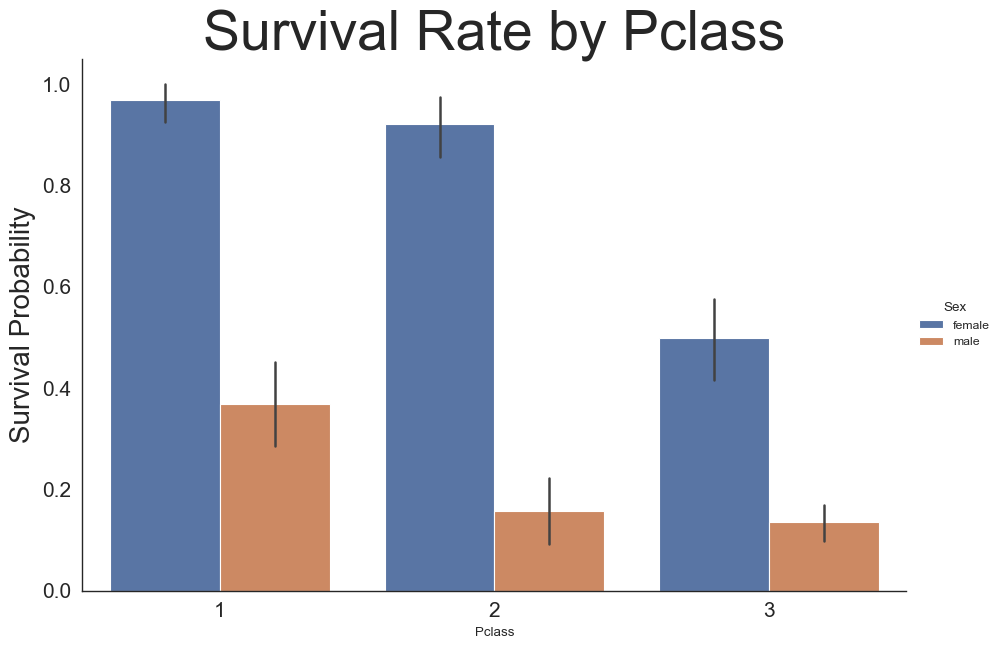

In [120]:
sns.catplot(x="Pclass", y="Survived", hue="Sex", data=titanic_data, kind="bar", height=6, aspect=1.5)
plt.title("Survival Rate by Pclass", fontsize= 40)
plt.ylabel("Survival Probability", fontsize= 20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

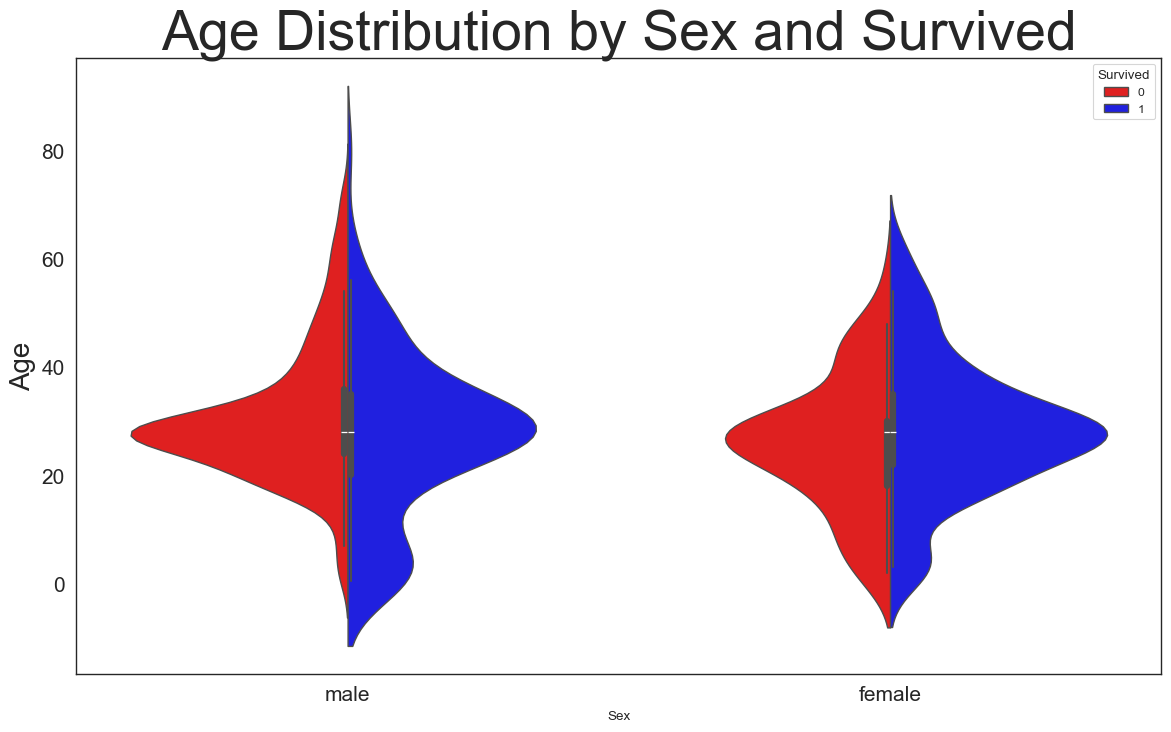

In [121]:
# VIOLIN PLOT

plt.figure(figsize=(14, 8))
sns.violinplot(x="Sex", y="Age", hue="Survived", data=titanic_data, split=True, palette={0:'red', 1:'blue'})

plt.title('Age Distribution by Sex and Survived', fontsize= 40)
plt.ylabel('Age', fontsize= 20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### STEP 8

# <span style="font-weight:bolt"> CORRELATION ANALYSIS </span>

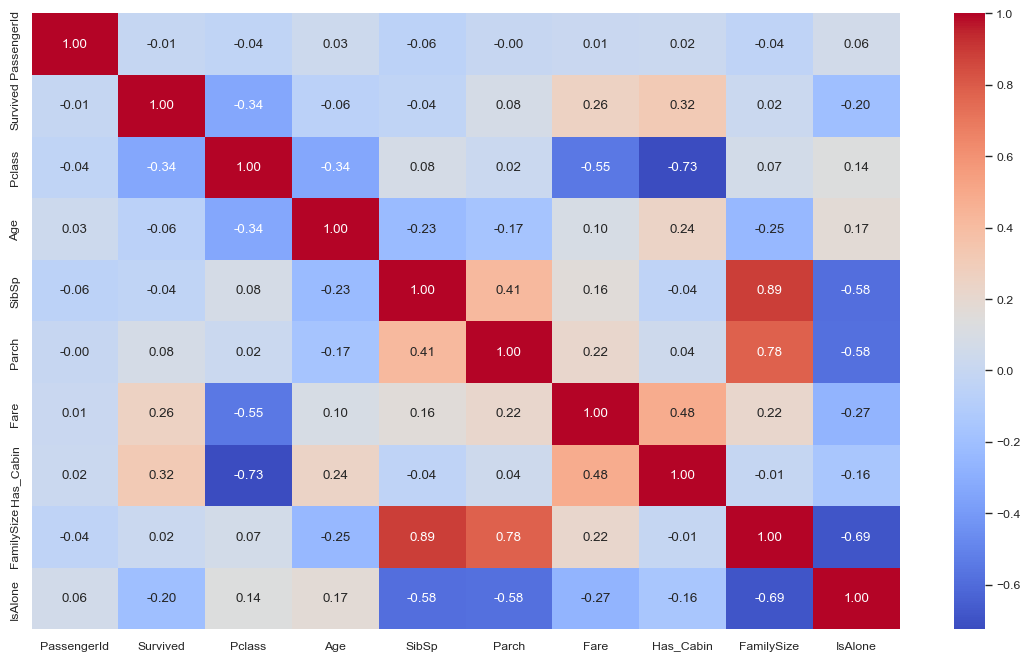

In [124]:
plt.figure(figsize=(14, 8))
numeric_cols = titanic_data.select_dtypes(include=np.number)
correlation_matrix = numeric_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.show()

<h4> INTERPRETATION </h4>

-   *Survived* has a +ve correlation with *Fare* and *HasCabin*
-   *Survived* has -ve correlation with *Pclass* and *IsAlone*
-   *Pclass* and *Fare* are strongly -ve correlated => ***1st class = high fares***
-   *FamilySize* feature is composed of *SibSp* and *Parch*, +ve correlation